<a href="https://colab.research.google.com/github/honhon13/sample/blob/main/Haus%C3%BCbung_02_statistical_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Aufgabe 8
import statsmodels.api as sm
import pandas as pd

In [3]:
auto_data = pd.read_csv("Auto.csv")
auto_data = auto_data.dropna()

In [4]:
X = sm.add_constant(auto_data['horsepower']) # Konstante hinzufügen
y = auto_data['mpg']

In [5]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           7.03e-81
Time:                        10:24:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MPG')

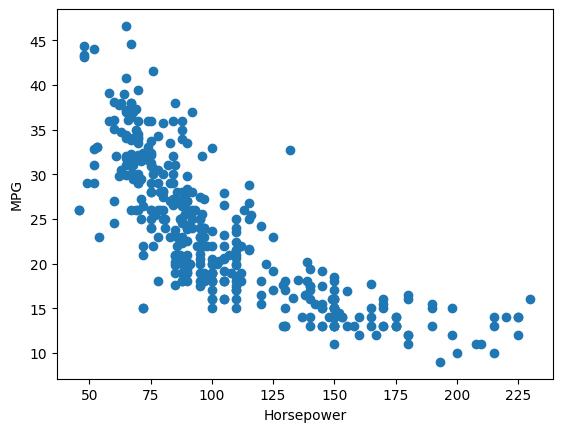

In [7]:
plt.scatter(auto_data['horsepower'], auto_data['mpg'],
label="Datenpunkte")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

<ipython-input-8-725d1f91ed32>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, model.params[0]), slope=model.params[1], color='red',


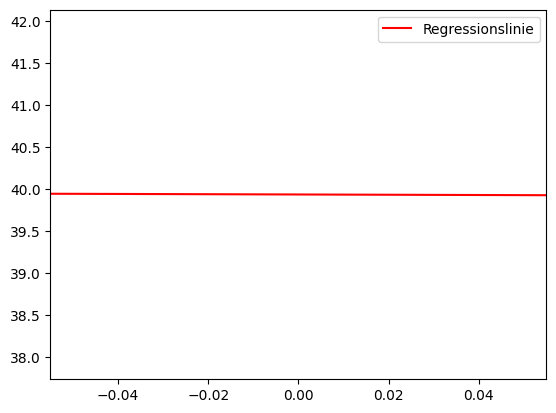

In [8]:
ax = plt.gca()
ax.axline((0, model.params[0]), slope=model.params[1], color='red',
label="Regressionslinie")
plt.legend()
plt.show()

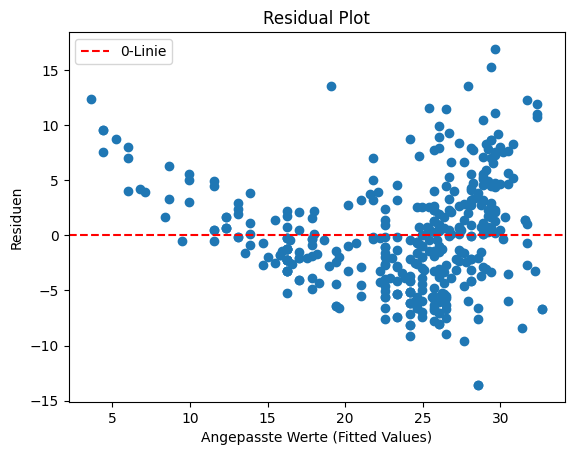

In [13]:
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--', label="0-Linie")
plt.xlabel("Angepasste Werte (Fitted Values)")
plt.ylabel("Residuen")
plt.title("Residual Plot")
plt.legend()
plt.show()

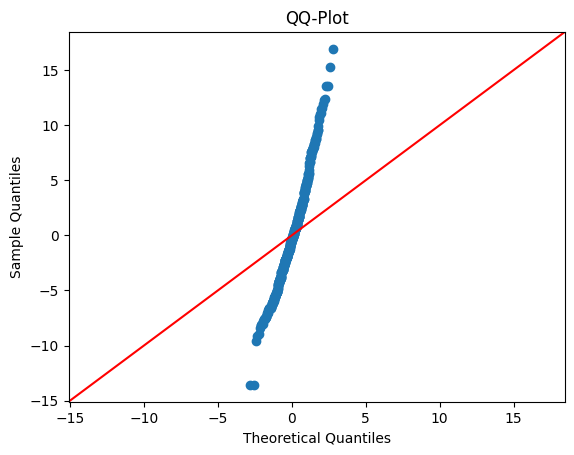

In [14]:
sm.qqplot(residuals, line='45')
plt.title("QQ-Plot")
plt.show()

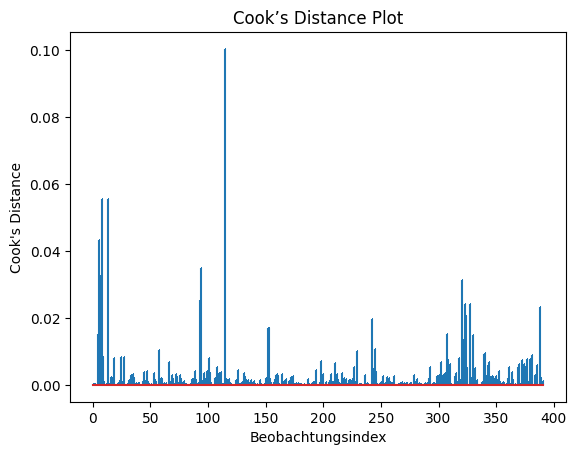

In [15]:
infl = model.get_influence()
cooks = infl.cooks_distance[0]
plt.stem(range(len(cooks)), cooks, markerfmt=",")
plt.xlabel("Beobachtungsindex")
plt.ylabel("Cook's Distance")
plt.title("Cook’s Distance Plot")
plt.show()

In [17]:
!pip install statsmodels

In [21]:
#Aufgabe 9
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm


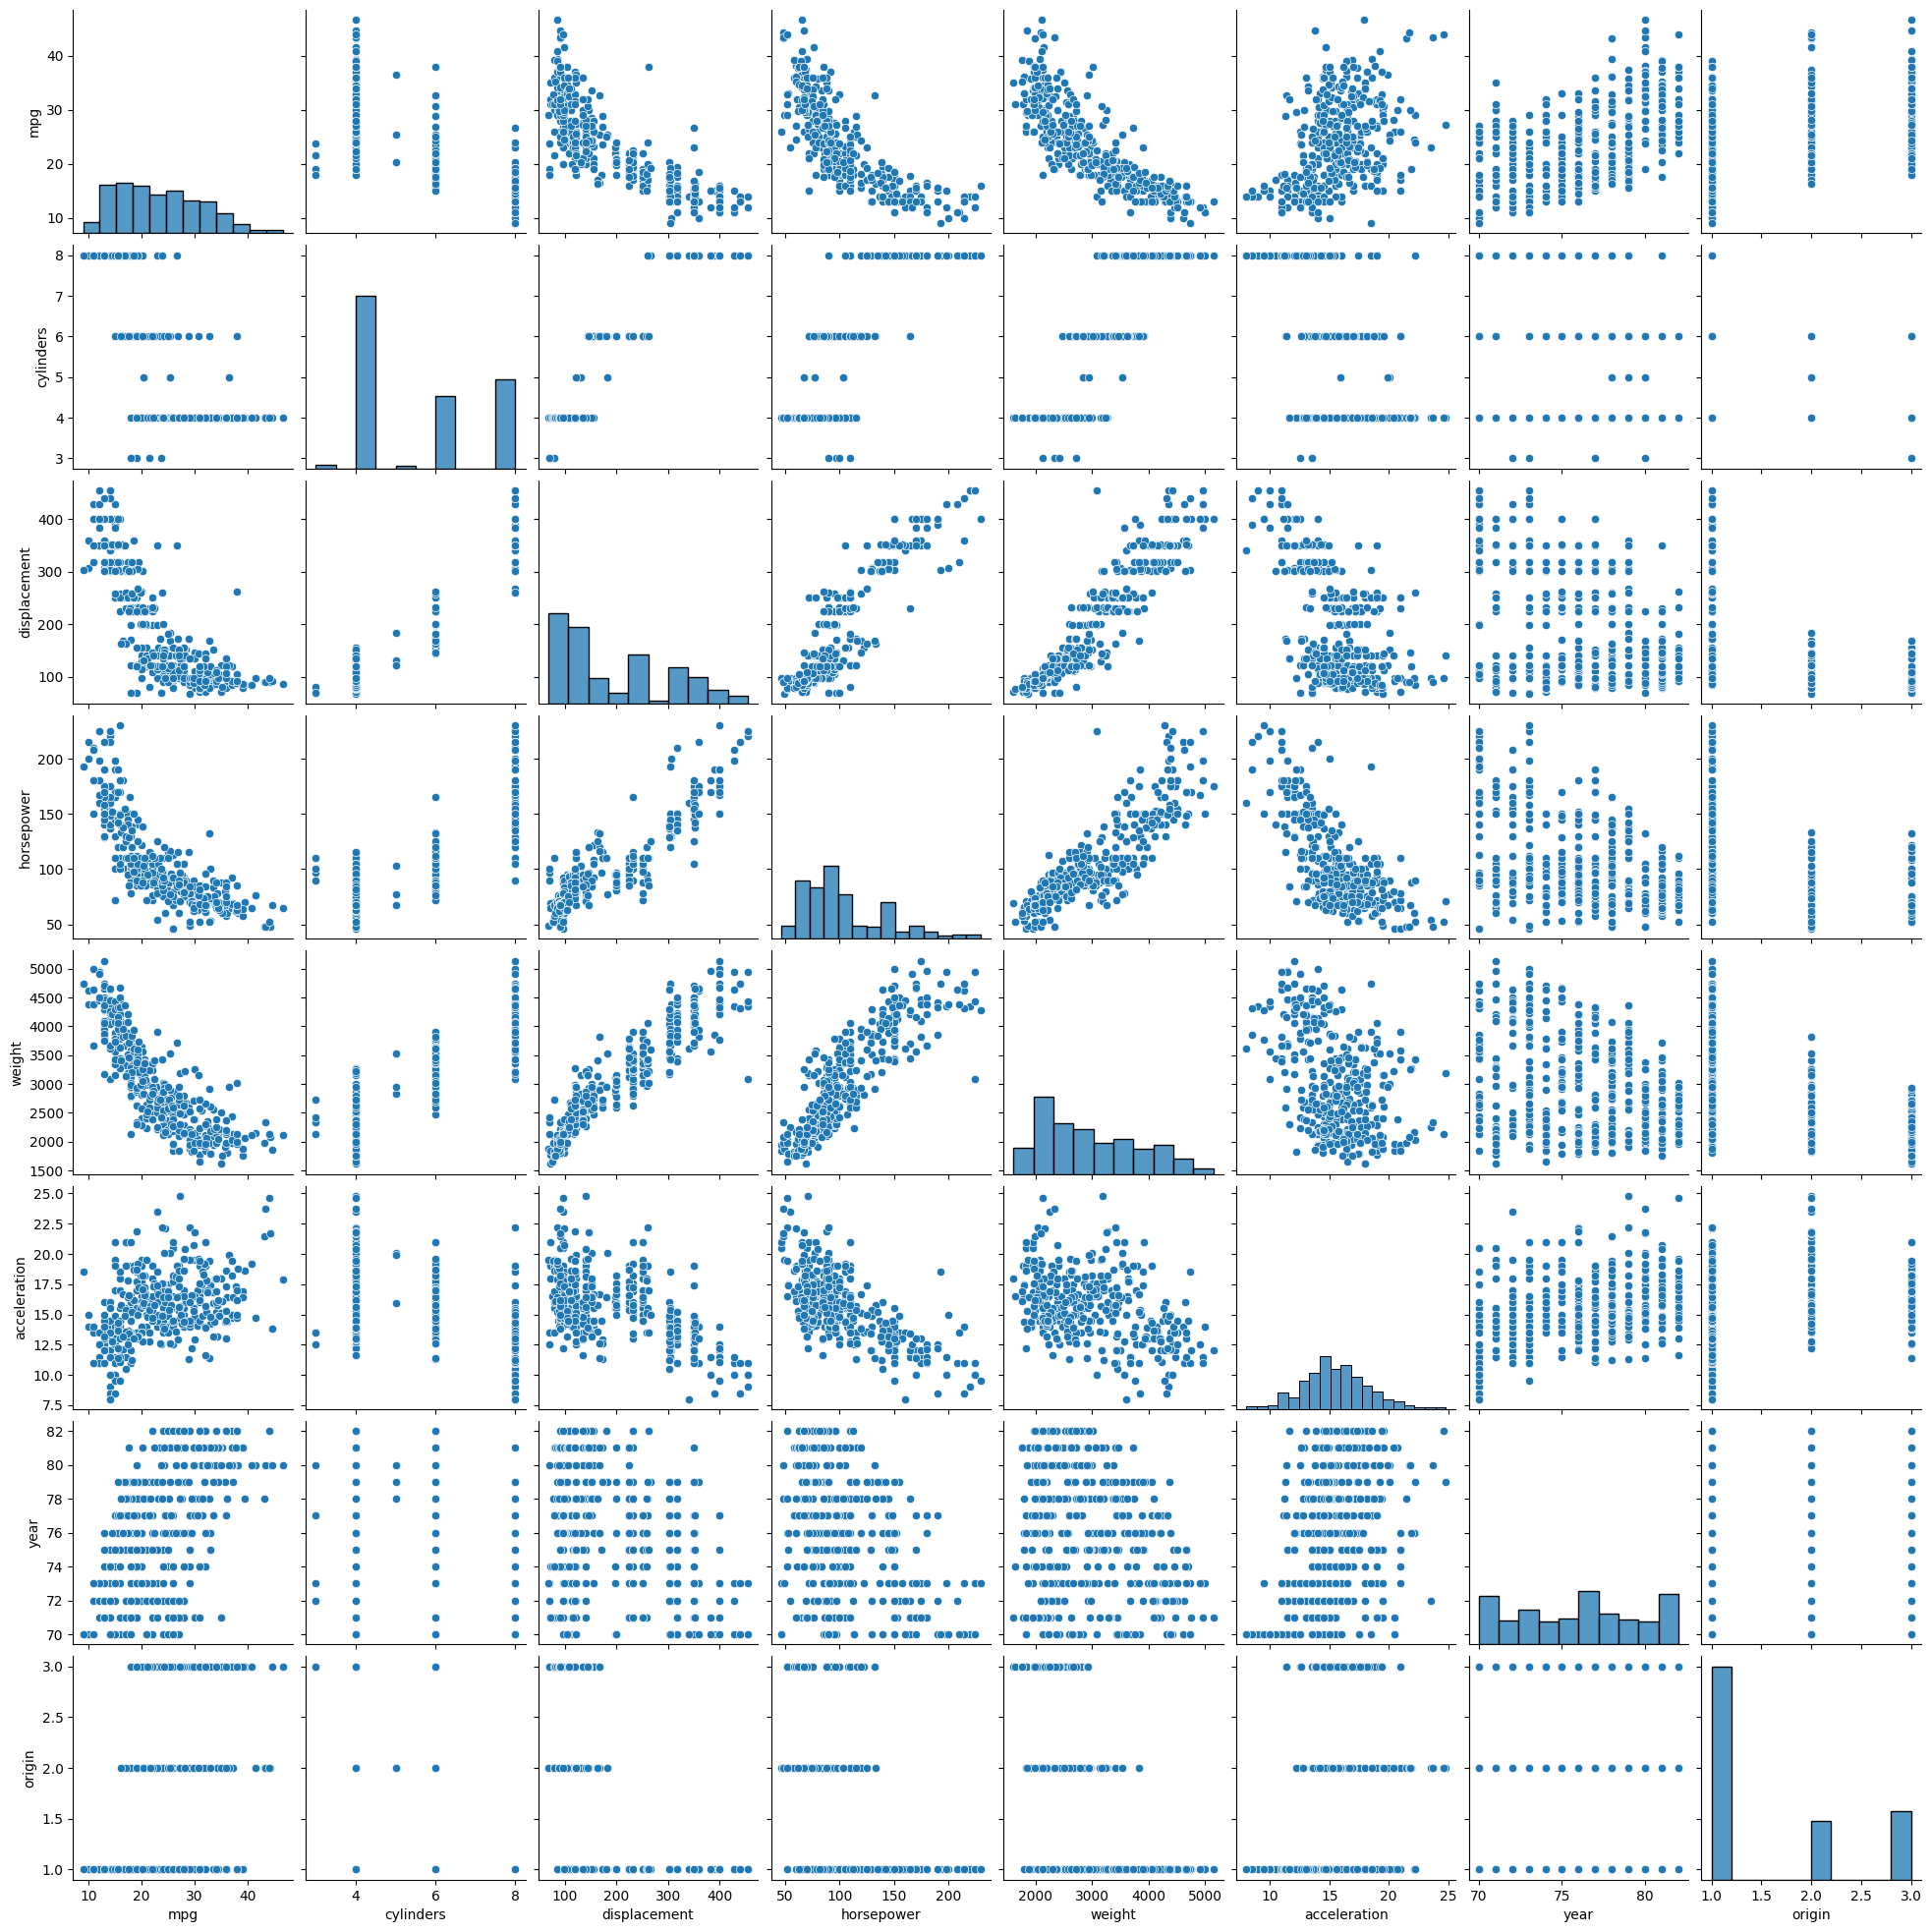

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Auto.csv")

# Drop missing values if any
data = data.dropna()

# Part (a): Scatterplot matrix
sns.pairplot(data)

# Show the plot
plt.show()

In [29]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv("Auto.csv")

# Drop missing values if any
data = data.dropna()

# Ensure all columns used are numeric
data_numeric = data.select_dtypes(include=['number'])

# Part (b): Correlation Matrix
correlation_matrix = data_numeric.corr()  # Use only numeric columns
print("Correlation Matrix:")
print(correlation_matrix)

# Part (c): Multiple Linear Regression
# Exclude 'name' column if present and set 'mpg' as the response variable
X = data_numeric.drop(columns=['mpg'], errors='ignore')  # Exclude 'mpg' from predictors
y = data_numeric['mpg']  # Response variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# Load the data
data = pd.read_csv("Auto.csv")

# Drop missing values if any
data = data.dropna()

# Ensure all columns used are numeric
data_numeric = data.select_dtypes(include=['number'])

# Part (b): Correlation Matrix
correlation_matrix = data_numeric.corr()  # Use only numeric columns
print("Correlation Matrix:")
print(correlation_matrix)

# Part (c): Multiple Linear Regression
# Exclude 'name' column if present and set 'mpg' as the response variable
X = data_numeric.drop(columns=['mpg'], errors='ignore')  # Exclude 'mpg' from predictors
y = data_numeric['mpg']  # Response variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print("Regression Model Summary:")
print(model.summary())

# Part (d): ANOVA
anova_results = anova_lm(model, typ=2)  # Perform ANOVA on the linear regression model
print("ANOVA Results:")
print(anova_results)

Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

AttributeError: 'PandasData' object has no attribute 'design_info'

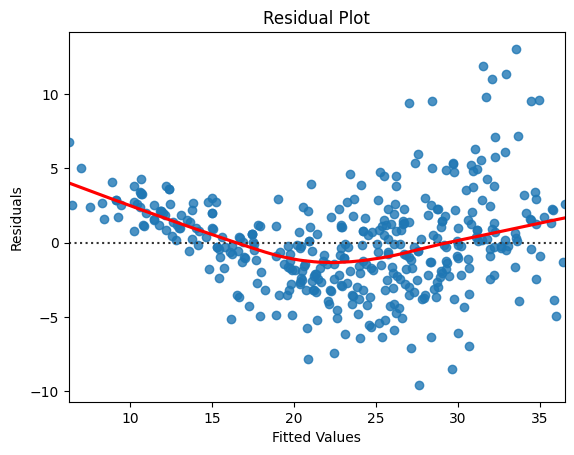

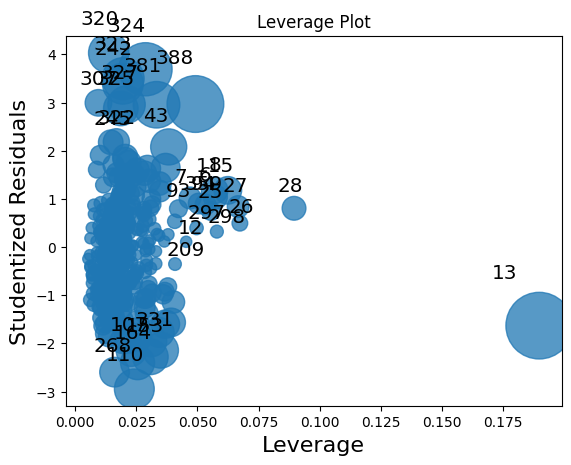

In [33]:
# Residual Plot
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Leverage Plot
sm.graphics.influence_plot(model, criterion="cooks")
plt.title("Leverage Plot")
plt.show()

In [34]:
X['horsepower_weight'] = data['horsepower'] * data['weight']
interaction_model = sm.OLS(y, X).fit()
print("Interaction Model Summary:")
print(interaction_model.summary())

Interaction Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          1.88e-159
Time:                        10:51:21   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const      

In [38]:
#f

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv("Auto.csv")

# Drop missing values if any
data = data.dropna()

# Ensure all columns used are numeric
data_numeric = data.select_dtypes(include=['number'])

# Set 'mpg' as the response variable and exclude 'name' if present
X = data_numeric.drop(columns=['mpg'], errors='ignore')  # Predictors
y = data_numeric['mpg']  # Response variable

# Add transformed features
X['log_weight'] = np.log(data_numeric['weight'])
X['weight_squared'] = data_numeric['weight']**2

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
transformation_model = sm.OLS(y, X).fit()

# Display the summary of the transformation model
print("Transformation Model Summary:")
print(transformation_model.summary())

Transformation Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     252.2
Date:                Sat, 11 Jan 2025   Prob (F-statistic):          9.57e-155
Time:                        10:52:43   Log-Likelihood:                -981.43
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     382   BIC:                             2023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [41]:
#13

import numpy as np
# Zufallsgenerator initialisieren
np.random.seed(1)
# 100 Beobachtungen aus einer N(0, 1)-Verteilung
x = np.random.normal(0, 1, 100)



In [42]:
# 100 Beobachtungen aus einer N(0, 0.25)-Verteilung
eps = np.random.normal(0, np.sqrt(0.25), 100)

In [43]:
# Berechnung von y gemäß Y = -1 + 0.5X + eps
y = -1 + 0.5 * x + eps

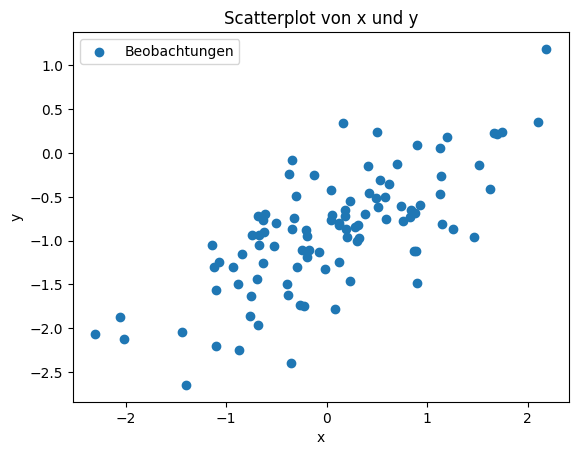

In [46]:
#d
import matplotlib.pyplot as plt
plt.scatter(x, y, label="Beobachtungen")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot von x und y")
plt.legend()
plt.show()

In [47]:
#e

import statsmodels.api as sm
# Hinzufügen einer Konstante zu x für das lineare Modell
X = sm.add_constant(x)
# Lineares Modell fitten
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           2.20e-17
Time:                        10:56:13   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

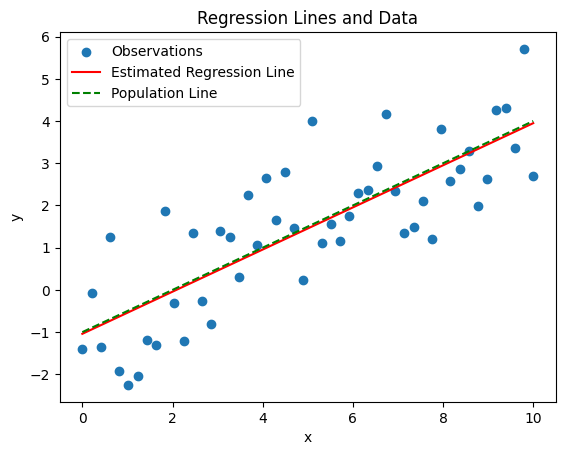

In [49]:
#f
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.linspace(0, 10, 50)  # Independent variable
y = -1 + 0.5 * x + np.random.normal(scale=1, size=50)  # Dependent variable with noise

# Fit a linear regression model using Statsmodels
import statsmodels.api as sm
X = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X).fit()

# Scatterplot of observations
plt.scatter(x, y, label="Observations")

# Estimated regression line
plt.plot(x, model.predict(X), color='red', label="Estimated Regression Line")

# Population regression line
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label="Population Line")

# Labels, legend, and title
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regression Lines and Data")

# Display the plot
plt.show()

In [50]:
#g

# Quadratischer Term hinzufügen
X_poly = sm.add_constant(np.column_stack((x, x**2)))
# Quadratisches Modell fitten
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     43.84
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.80e-11
Time:                        10:57:27   Log-Likelihood:                -74.931
No. Observations:                  50   AIC:                             155.9
Df Residuals:                      47   BIC:                             161.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3931      0.456     -3.058      0.0

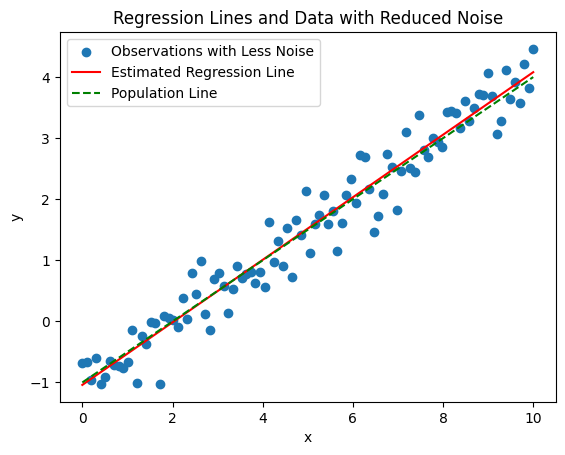

In [52]:
#h

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate example data
x = np.linspace(0, 10, 100)  # Independent variable

# Reducing noise: Creating less noisy response variable
eps_less_noise = np.random.normal(0, np.sqrt(0.1), 100)  # Reduced noise
y_less_noise = -1 + 0.5 * x + eps_less_noise  # Response variable with less noise

# Fit a linear regression model using Statsmodels
X = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y_less_noise, X).fit()

# Scatterplot of observations with reduced noise
plt.scatter(x, y_less_noise, label="Observations with Less Noise")

# Estimated regression line
plt.plot(x, model.predict(X), color='red', label="Estimated Regression Line")

# Population regression line
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label="Population Line")

# Labels, legend, and title
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regression Lines and Data with Reduced Noise")

# Display the plot
plt.show()

In [54]:
# Erhöhtes Rauschen
eps_more_noise = np.random.normal(0, np.sqrt(1), 100)
y_more_noise = -1 + 0.5 * x + eps_more_noise
plt.show()

In [56]:
# j
#Konfidenzintervalle für das ursprüngliche Modell
print("Original:", model.conf_int(alpha=0.05))
# Konfidenzintervalle für weniger Rauschen
model_less_noise = sm.OLS(y_less_noise, X).fit()
print("Weniger Rauschen:", model_less_noise.conf_int(alpha=0.05))
# Konfidenzintervalle für mehr Rauschen
model_more_noise = sm.OLS(y_more_noise, X).fit()
print("Mehr Rauschen:", model_more_noise.conf_int(alpha=0.05))

Original: [[-1.17370719 -0.90664924]
 [ 0.48899093  0.53513036]]
Weniger Rauschen: [[-1.17370719 -0.90664924]
 [ 0.48899093  0.53513036]]
Mehr Rauschen: [[-1.10364997 -0.29630913]
 [ 0.37890578  0.51838953]]


In [57]:
#14

import numpy as np
# Zufallsgenerator initialisieren
rng = np.random.default_rng(10)
# Daten erzeugen
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Korrelation zwischen x1 und x2: 0.772324497691354


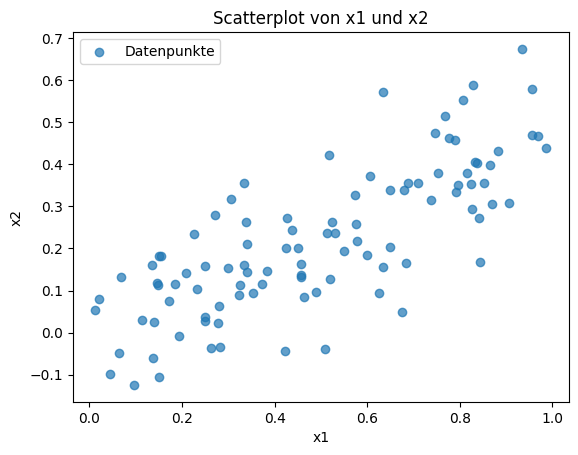

In [58]:
import matplotlib.pyplot as plt
# Korrelation berechnen
correlation = np.corrcoef(x1, x2)[0, 1]
print("Korrelation zwischen x1 und x2:", correlation)
# Scatterplot erstellen
plt.scatter(x1, x2, label="Datenpunkte", alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot von x1 und x2")
plt.legend()
plt.show()

In [59]:
#c
import statsmodels.api as sm
# Design-Matrix erstellen
X = sm.add_constant(np.column_stack((x1, x2)))
# Regression fitten
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           5.76e-08
Time:                        11:00:22   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

In [60]:
#d

# Regression mit x1
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1).fit()
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.37e-08
Time:                        11:00:35   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

In [61]:
#e
# Regression mit x2
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           7.43e-07
Time:                        11:00:45   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

In [63]:
#g

import numpy as np
import statsmodels.api as sm

# Generate example data (for x1, x2, and y)
x1 = np.random.uniform(0, 1, 100)  # Independent variable x1
x2 = np.random.uniform(0, 1, 100)  # Independent variable x2
y = -1 + 0.5 * x1 + 1.5 * x2 + np.random.normal(0, 0.5, 100)  # Response variable with noise

# Adding an additional data point
x1 = np.concatenate([x1, [0.1]])  # New x1 value
x2 = np.concatenate([x2, [0.8]])  # New x2 value
y = np.concatenate([y, [6]])  # New response value

# Fit the model with both x1 and x2
X = sm.add_constant(np.column_stack((x1, x2)))  # Create design matrix with a constant term
model = sm.OLS(y, X).fit()

# Fit the model with only x1
X_x1 = sm.add_constant(x1)  # Design matrix for x1 only
model_x1 = sm.OLS(y, X_x1).fit()

# Fit the model with only x2
X_x2 = sm.add_constant(x2)  # Design matrix for x2 only
model_x2 = sm.OLS(y, X_x2).fit()

# Display the summaries of the models
print("New Model with x1 and x2:")
print(model.summary())
print("\nNew Model with x1 alone:")
print(model_x1.summary())
print("\nNew Model with x2 alone:")
print(model_x2.summary())



New Model with x1 and x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     28.19
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           2.14e-10
Time:                        11:01:34   Log-Likelihood:                -109.36
No. Observations:                 101   AIC:                             224.7
Df Residuals:                      98   BIC:                             232.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9830     